In [1]:
!pip install wordcloud
!pip install krwordrank

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import defaultdict
import time
import datetime
import os
import json
from krwordrank.word import KRWordRank
from wordcloud import WordCloud


def tree(): 
    return defaultdict(tree)

driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(10)
driver.get('https://everytime.kr/login')

# 접속
driver.find_element_by_xpath('//*[@id="container"]/form/p[1]/input').send_keys(id 문자열로 넣기)   # 아이디
driver.find_element_by_xpath('//*[@id="container"]/form/p[2]/input').send_keys(passwrod 문자열로 넣기)   # 비밀번호
driver.find_element_by_xpath('//*[@id="container"]/form/p[3]/input').click()                # 로그인 버튼
time.sleep(2)
driver.find_element_by_xpath('//*[@id="submenu"]/div/div[7]/ul/li[3]/a').click()          # 자유게시판 클릭

everytime_link = list() # 링크 리스트
fail_link = list() # 실패 리스트
page_number = 2
content_number = 0


if not os.path.isdir("./Result19/"):
    os.mkdir("./Result19/") 
    
for i in range(1):
    time.sleep(5)    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    content = soup.findAll('article')

    for url in content:
        find_url = url.find('a', attrs={'class', 'article'}).get('href')
        everytime_link.append(find_url)
    time.sleep(2)
    driver.get('https://everytime.kr/372404/p/' + str(page_number)) # 19금 게시판 url
    page_number = page_number + 1

with open('./everytime_link.txt', 'w') as fileobject:
    for join_link in everytime_link:
        fileobject.write(join_link)
        fileobject.write('\n')



for url in everytime_link:
        
    time_now = datetime.datetime.now()      #현재 시간 저장
    json_data = dict()
    comment_text = list()
    comment_time = list()
    json_data['comment_text'] = list()
    json_data['comment_time'] = list()
    
    try:
        driver.get('https://everytime.kr' + url)
        time.sleep(5)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # append 로 수정할것
        title = soup.find('h2', attrs={'class', 'large'}).get_text()
        text = soup.find('p', attrs={'class', 'large'}).get_text()
        text_time = soup.find('time', attrs={'class', 'large'}).get_text()
        try:
            comment = soup.findAll('article')

            for content in comment:
                comment_text.append(content.find('p').get_text())
                comment_time.append(content.find('time').get_text())
        except:
            pass                   #댓글없음
        
        
        json_data['title'] = title
        json_data['text'] = text
        json_data['tex_time'] = text_time
        json_data['now_time'] = str(time_now)
        
        json_data['comment_text'] = comment_text
        json_data['comment_time'] = comment_time
        
    except Exception as e:
        print(e)
        fail_link.append(url)
        continue

    with open('./Result19/' + 'text' + str(content_number) + '.txt', 'w') as fileobject:
        json.dump(json_data, fileobject)
        content_number = content_number + 1
            
            
with open('./fail_url2.txt', 'w') as fileobject:
    for join_link in fail_link:
        fileobject.write(join_link)
        fileobject.write('\n')
            
driver.close()

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=71.0.3578.98)
  (Driver info: chromedriver=2.45.615291 (ec3682e3c9061c10f26ea9e5cdcf3c53f3f74387),platform=Windows NT 10.0.17134 x86_64)


In [4]:
def search(dirname):        # 디렉토리 속 파일 경로 리스트 가져오기 ex : ./Result/file.txt
    file_name_list = list()
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        file_name_list.append(full_filename)
    return file_name_list

def file_read(file_name_list):  # json 으로 해당 경로 파일 가져오기
    data = list()
    for file_path in file_name_list:
        with open(file_path, 'r') as file_point:
            data.append(json.load(file_point))
    return data




In [10]:
file_list = search('./Result/')
data = file_read(file_list)

#print(file_list)
print(data[0].keys())
print(data[4]['title'])
print(data[0]['text'])

dict_keys(['comment_text', 'comment_time', 'title', 'text', 'tex_time', 'now_time'])
다들 언제 천안와?
머리 자른거이상해서 모자쓰고 나가려는데 처음만나는데 모자는 좀 매너없는건가..?


In [17]:
wordrank_extractor = KRWordRank(
    min_count = 10, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 15, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10


input_text = str()
text = list()
for content in data:
    text.append(content['text'])
    text.append(content['title'])
    
    for comment in content['comment_text']:
        text.append(comment)

input_text = ' '.join(text)

In [18]:
print(input_text)
type(input_text)

머리 자른거이상해서 모자쓰고 나가려는데 처음만나는데 모자는 좀 매너없는건가..? 소개받아서 내일 처음만나는데 머리 자른거이상해서 모자쓰고 나가려는데 처음만나는데 모자는 좀 매너없는건가..? 하루하루 섭섭하구나 남친아 하루하루 섭섭하구나 연락문제? 아직 안태어나서 다자녀 장학금은 몇명기준이고 지급방식도 어떻게되는거야? 장학금 관련해서 다자녀 장학금은 몇명기준이고 지급방식도 어떻게되는거야? 세자녀이상부터고 지급방식은 등록금에서 까짐 3명이상 첫째부터 막내까지 상관x 8분위이내면 가능 1유형이랑 중복안되서 조간 충족하면 다자녀로 등록금 깎이는거야 조간->조건 나도 이번 학기 끝나면 졸업이고 대학생활 내내 아싸로 지냈는데 졸업식을 굳이 가야할 필요가 있을까...? 방금 밑에 있던 졸업식 글처럼 나도 이번 학기 끝나면 졸업이고 대학생활 내내 아싸로 지냈는데 졸업식을 굳이 가야할 필요가 있을까...? 졸업식 안오는사람들 많아 ㅎㅎ걱정마 어차피 다들 사진이나 찍으러 오는거라 안 가는 사람 짱 많아요 안가두 됌 나는 3/1에 오는뎅다른사람들 괜히 궁금함 다들 언제 천안와? 나는 3/1에 오는뎅다른사람들 괜히 궁금함 2.24 설끝나고바로 설끝나고바로 지금도 학교다님 나는 21년도에 개봉안한거 2만원에 팔아요 입생로랑 루쥬볼립떼샤인 12호 개봉안한거 2만원에 팔아요 헉 저뇨 쨍한 핑크에요? 이고 완전히 코랄이에여 저도 개봉안해서 모르겠어요ㅎㅎ 블로그에 발색사진 잘 나와있어요! https://open.kakao.com/o/sZS6SEdb 저 살래요 카트라이더 자동차가 벼루 모양인데요.벼루 알죠? 붓 먹 뭍히는 벼루제가 벼루를 주고 타고 다녀서 닉네임을 닉값하게바꾸려고 하는데 신박한 닉네임 있을까여🤔😓 카트라이더 닉네임 추천 카트라이더 자동차가 벼루 모양인데요.벼루 알죠? 붓 먹 뭍히는 벼루제가 벼루를 주고 타고 다녀서 닉네임을 닉값하게바꾸려고 하는데 신박한 닉네임 있을까여🤔😓 벼루고다닌다 붓잡히기만해봐 좀 야한거 ㄱㅊ하면 벼루가즘 ㅈㄴㄱㄷ) 작명센스오졋다 추천드림 별루 벼루별루 

str

In [16]:
keywords = None
rank = ''
graph = None
keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)

scan vocabs ... 
num vocabs = 1235
done = 10 Early stopped.


In [19]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:60]:
    print('%8s:\t%.4f' % (word, r))

      내가:	7.0122
      진짜:	6.9308
      나도:	4.9102
      그냥:	4.8612
      사람:	4.8292
      너무:	4.6972
     삭제된:	4.4505
      수업:	4.4019
      ㅠㅠ:	3.4029
      같이:	3.3902
      전공:	3.2766
     어떻게:	3.2601
      아니:	3.2098
      ㅋㅋ:	3.1924
      근데:	3.0465
      지금:	2.8296
      나는:	2.8257
      혹시:	2.8200
     교수님:	2.7513
     이렇게:	2.6251
      정말:	2.5675
      다들:	2.5448
      하는:	2.5058
      많이:	2.4306
      우리:	2.3085
      친구:	2.1735
      있는:	2.0723
      하나:	2.0564
      계속:	2.0511
      그거:	2.0478
      서로:	2.0018
      싸강:	1.9992
      그런:	1.9531
      생각:	1.9003
      들어:	1.8877
      다른:	1.8733
      오늘:	1.8381
      연락:	1.8371
      ㅜㅜ:	1.8203
      이제:	1.7175
     이번에:	1.6712
  댓글입니다.:	1.6460
     그래서:	1.6318
      저도:	1.5407
      이거:	1.4809
      하면:	1.4624
      그럼:	1.4574
      추천:	1.4406
      교양:	1.4235
     초면에:	1.4131
     그리고:	1.4011
      좋은:	1.3976
      ㄹㅇ:	1.3377
      강의:	1.3225
      ㅎㅎ:	1.3223
      절대:	1.2997
      남친:	1.2857
      한번:	1.2781
      좋아:	1.27

In [27]:
print(keywords)
print(type(keywords))

{'내가': 7.012176508708188, '진짜': 6.93075013038038, '나도': 4.910207422493632, '그냥': 4.861219328446708, '사람': 4.829200900105935, '너무': 4.697183458735927, '삭제된': 4.450530220159293, '수업': 4.4019167810174125, 'ㅠㅠ': 3.4029258844898793, '같이': 3.3902133379531985, '전공': 3.276625512568155, '어떻게': 3.260149940531499, '아니': 3.209767616874798, 'ㅋㅋ': 3.192389984522214, '근데': 3.046539362817057, '지금': 2.829580858690222, '나는': 2.825688411907347, '혹시': 2.8200131749870567, '교수님': 2.7513053405165815, '이렇게': 2.625141511114593, '정말': 2.5675120481994655, '다들': 2.5447722087662097, '하는': 2.505828919010939, '많이': 2.4306451225729444, '우리': 2.308459439356643, '친구': 2.173523112528609, '있는': 2.0722989925224504, '하나': 2.0563669389677415, '계속': 2.0511486618097248, '그거': 2.0477789824878436, '서로': 2.0017966389198865, '싸강': 1.9992090831043061, '그런': 1.9531259517217379, '생각': 1.900297034301115, '들어': 1.887683295968917, '다른': 1.8732965467707472, '오늘': 1.8380557904874415, '연락': 1.8370599175843285, 'ㅜㅜ': 1.8203471555318749, '이

In [28]:
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf',
    width = 1200,
    height = 1200,
    background_color="white"
)

keywords.pop('삭제된')     # 이상한 값들 제거
keywords.pop('댓글입니다.')
keywords.pop('처리중입니다')

#wordcloud = wordcloud.generate_from_text(text)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [29]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [30]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (, 800, 3)

<class 'numpy.ndarray'>
(1200, 1200, 3)


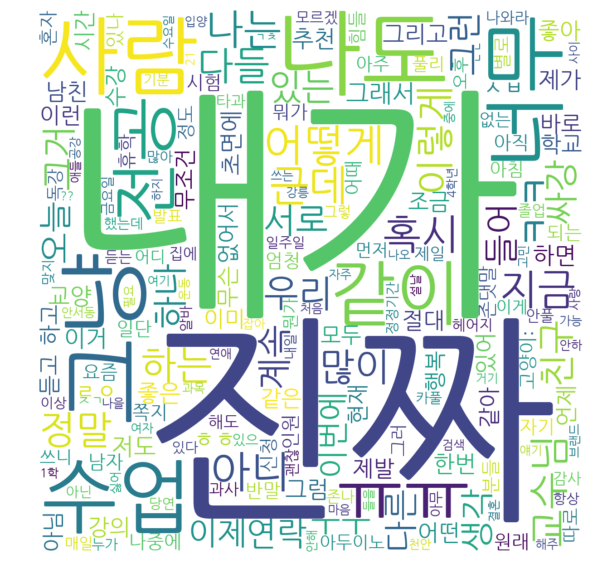

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('자게3.png')